In [1]:
from simforest import SimilarityForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset_glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'


In [4]:
from sklearn.preprocessing import LabelEncoder

y = df.pop('Type')
X = df

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

In [7]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

In [8]:
y_test = encoder.transform(y_test)

In [10]:
sf = SimilarityForestClassifier()
sf.fit(X_train, y_train)
sf_pred = sf.predict(X_test)

In [11]:
accuracy_score(y_test, sf_pred)

0.7076923076923077

In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

/home/sfczekalski/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
accuracy_score(y_test, rf_pred)

0.6

In [14]:
params = {
    'n_trees': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}
sf_nt = GridSearchCV(SimilarityForestClassifier(),
                  param_grid=params, cv=5)

sf_nt.fit(X_train, y_train)
sf_nt_pred = sf_nt.predict(X_test)
accuracy_score(y_test, sf_nt_pred)

/home/sfczekalski/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7538461538461538

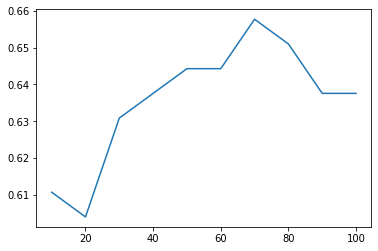

In [16]:
plt.plot(range(10,110,10), sf_nt.cv_results_['mean_test_score'])

In [18]:
params = {
    'n_directions': [1, 2, 3, 4, 5]
}
sf_dirs = GridSearchCV(SimilarityForestClassifier(n_trees=70),
                  param_grid=params, cv=5)

sf_dirs.fit(X_train, y_train)
sf_dirs_pred = sf_dirs.predict(X_test)
accuracy_score(y_test, sf_nt_pred)

/home/sfczekalski/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7538461538461538

In [30]:
sf_dirs.best_params_

{'n_directions': 2}

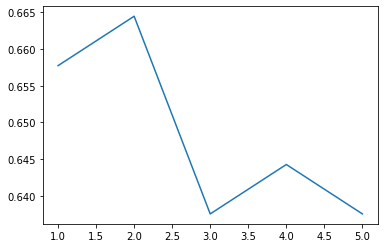

In [20]:
plt.plot(range(1, 6, 1), sf_dirs.cv_results_['mean_test_score'])

In [31]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier

clf = OneVsRestClassifier(SimilarityForestClassifier(n_directions=4))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7538461538461538

In [48]:
clf = OneVsRestClassifier(SimilarityForestClassifier(n_trees=60, n_directions=1))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7538461538461538

In [57]:
sf_n_trees = OneVsOneClassifier(SimilarityForestClassifier(n_trees=50, n_directions=1))

sf_n_trees.fit(X_train, y_train)
sf_n_trees_pred = sf_n_trees.predict(X_test)
accuracy_score(y_test, sf_n_trees_pred)

0.7384615384615385

In [70]:
clf = OutputCodeClassifier(SimilarityForestClassifier(n_trees=50, n_directions=5), code_size=2.0, random_state=42, n_jobs=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7846153846153846